In [1]:
import json

with open('recipies.json') as json_file:
    recipies = json.load(json_file)

In [2]:
recipies_dict = {}
for r in recipies:
    recipies_dict[r['id']] = {'cuisine': r['cuisine'], 'ingredients':r['ingredients']}

In [3]:
import pandas as pd
recipies_df = pd.DataFrame.from_dict(recipies_dict)

In [11]:
recipies_df.head()

,10259,25693,20130,22213,13162,6602,42779,3735,16903,12734,...,8089,6153,25557,24348,7377,29109,11462,2238,41882,2362
cuisine,greek,southern_us,filipino,indian,indian,jamaican,spanish,italian,mexican,italian,...,mexican,indian,irish,italian,mexican,irish,italian,irish,chinese,mexican
ingredients,"[romaine lettuce, black olives, grape tomatoes...","[plain flour, ground pepper, salt, tomatoes, g...","[eggs, pepper, salt, mayonaise, cooking oil, g...","[water, vegetable oil, wheat, salt]","[black pepper, shallots, cornflour, cayenne pe...","[plain flour, sugar, butter, eggs, fresh ginge...","[olive oil, salt, medium shrimp, pepper, garli...","[sugar, pistachio nuts, white almond bark, flo...","[olive oil, purple onion, fresh pineapple, por...","[chopped tomatoes, fresh basil, garlic, extra-...",...,"[chili powder, worcestershire sauce, celery, r...","[coconut, unsweetened coconut milk, mint leave...","[rutabaga, ham, thick-cut bacon, potatoes, fre...","[low-fat sour cream, grated parmesan cheese, s...","[shredded cheddar cheese, crushed cheese crack...","[light brown sugar, granulated sugar, butter, ...","[KRAFT Zesty Italian Dressing, purple onion, b...","[eggs, citrus fruit, raisins, sourdough starte...","[boneless chicken skinless thigh, minced garli...","[green chile, jalapeno chilies, onions, ground..."


20


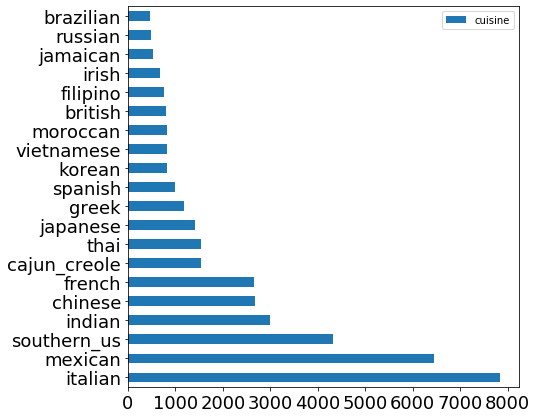

In [59]:
import matplotlib.pyplot as plt
recipies_count_df = pd.DataFrame(recipies_df.loc['cuisine'].value_counts())
recipies_count_df.plot.barh(figsize=(7,7),fontsize=18)
print(len(recipies_count_df))

In [68]:
df_ingredients = pd.DataFrame(recipies_df.loc['ingredients'])

In [8]:
import numpy as np

In [9]:
#test train split
n = len(recipies_df.columns)
ind = np.arange(n)
np.random.shuffle(ind)

In [65]:
from sklearn.model_selection import train_test_split
ind_train, ind_test = train_test_split(
    ind, test_size=0.2, random_state=1)
#ind_train, ind_val = train_test_split(
#    ind_train, test_size=0.25, random_state=1)

In [66]:
ind_train

array([22956, 24367,  1008, ..., 12732, 10574, 38040])

In [69]:
df_ingredients['ingredients']
df_ingredients = pd.DataFrame({'id':np.repeat(df_ingredients.index, df_ingredients.ingredients.str.len()),
                        'cuisine':np.repeat(recipies_df.loc['cuisine'].values, df_ingredients.ingredients.str.len()),
                        'ingredients':np.concatenate(df_ingredients.ingredients.values)})

In [12]:
df_ingredients.set_index('id')

,cuisine,ingredients
id,,
10259,greek,romaine lettuce
10259,greek,black olives
10259,greek,grape tomatoes
10259,greek,garlic
10259,greek,pepper
10259,greek,purple onion
10259,greek,seasoning
10259,greek,garbanzo beans
10259,greek,feta cheese crumbles


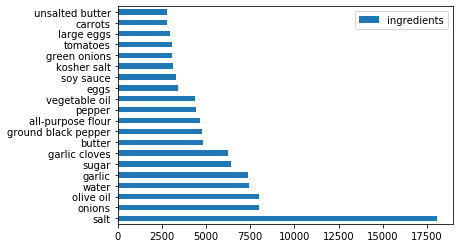

In [180]:
df_ingredients_counts = pd.DataFrame(df_ingredients['ingredients'].value_counts())
df_ingredients_counts[0:20].plot.barh()

In [13]:
df_ingredients_ohe = pd.get_dummies(df_ingredients,columns=['ingredients'])

In [275]:
df_ingredients_ohe.head(10)

,id,cuisine,ingredients_( oz.) tomato sauce,ingredients_( oz.) tomato paste,ingredients_(10 oz.) frozen chopped spinach,"ingredients_(10 oz.) frozen chopped spinach, thawed and squeezed dry",ingredients_(14 oz.) sweetened condensed milk,ingredients_(14.5 oz.) diced tomatoes,ingredients_(15 oz.) refried beans,ingredients_1% low-fat buttermilk,...,ingredients_yukon gold potatoes,ingredients_yuzu,ingredients_yuzu juice,ingredients_za'atar,ingredients_zest,ingredients_zesty italian dressing,ingredients_zinfandel,ingredients_ziti,ingredients_zucchini,ingredients_zucchini blossoms
0,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,25693,southern_us,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
x = df_ingredients_ohe[df_ingredients_ohe.columns[2:]]

In [16]:
import pickle
pickle.dump(x,open('df_ingredients_ohe_values.p','wb'))

In [17]:
y = df_ingredients_ohe['cuisine']

In [57]:
test = np.vstack([[0,i] for i in np.arange(5)])
print(test)

[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]]


In [70]:
x_train = np.vstack([x.iloc[df_ingredients[df_ingredients.id == t].index] for t in ind_train])

In [71]:
y_train = np.concatenate([y.iloc[df_ingredients[df_ingredients.id == t].index] for t in ind_train])

In [72]:
x_test = np.vstack([x.iloc[df_ingredients[df_ingredients.id == t].index] for t in ind_test])
y_test = np.concatenate([y.iloc[df_ingredients[df_ingredients.id == t].index] for t in ind_test])

In [74]:
pickle.dump(x_train,open('x_train.p','wb'))
pickle.dump(y_train,open('y_train.p','wb'))
pickle.dump(x_test,open('x_test.p','wb'))
pickle.dump(y_test,open('y_test.p','wb'))

In [1]:
import pickle
x_train = pickle.load(open('x_train.p','rb'))
y_train = pickle.load(open('y_train.p','rb'))
x_test = pickle.load(open('x_test.p','rb'))
y_test = pickle.load(open('y_test.p','rb'))

In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial',random_state=0, solver='lbfgs').fit(x_train,y_train)

clf.predict(x_test)

KeyboardInterrupt: 

In [4]:
from sklearn.datasets import load_iris
>>> from sklearn.linear_model import LogisticRegression
>>> X, y = load_iris(return_X_y=True)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
